## 02 결정트리

결정트리- 앙상블의 기본 알고리즘 
- 어떻게 트리를 분할할 것인가? : 최대한 균일한 데이터 세트를 구성할 수 있도록 분할 
- 정보 균일도 : 정보이득( 엔트로피) , 지니 계수(불평등지수=1)
- 단점 - 과적합으로 정확도가 떨어짐


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(min_samples_split=4,random_state = 156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size= 0.2, random_state =11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=156, splitter='best')

In [9]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file 로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file = "tree.dot",class_names= iris_data.target_names,\
                feature_names = iris_data.feature_names, impurity=True, filled=True)

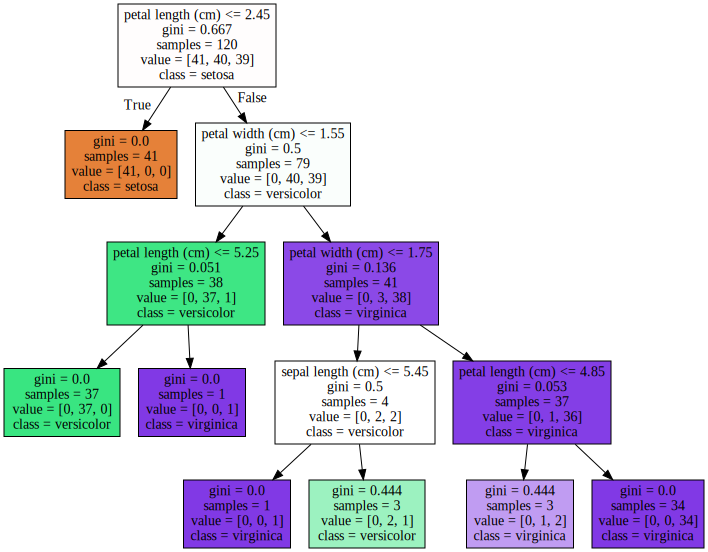

In [10]:
import graphviz 
# 위에서 생성된 tree.dot 파일을 Graphviz 가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

각 노드의 색깔은 레이블값 주황색은 0: Setosa , 초록색은 1:Versicolor, 보라색은 2:Virginica 
색깔이 짙어질수록 지니 계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다는 의미
1개라도 안걸러지면 다시 노드를 만드므로 결정트리는 규칙 생성 로직을 미리 제어하지 않으면 완벽하게 클래스 값을 구별해내기 
 계속 트리노드를 만듦--> 매우 복잡한 규칙 트리가 만들어져 모델이 쉽게 과적합됨 
때문에 제어 파라미터를 사용
- max_depth: 결정 트리의 최대 트리 깊이를 제어 
- min_samples_split: 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 갯수, 샘플갯수의 합이 min_sample_split 값보다 작으면 더 이상 분할을 하지 않고 리프노드가 됨
- min_samples_leaf: 리프 노드(자식노드가 없는)가 될 수 있는 조건 완화 

Feature importances:
[0.009 0.    0.557 0.435]
sepal length (cm):0.009
sepal width (cm):0.000
petal length (cm):0.557
petal width (cm):0.435


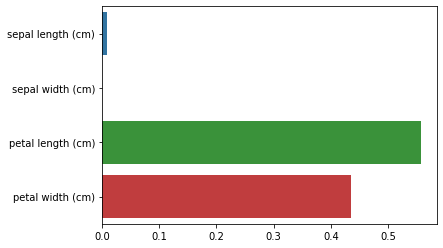

In [11]:
# feature importance : 피처별로 중요도
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

# feature 별 importance 매핑
for name, value in zip(iris_data.feature_names,dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))
    
# feature importance 를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_,y=iris_data.feature_names)

### 결정 트리 과적합

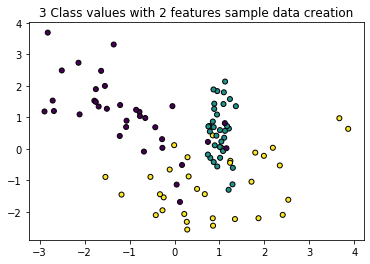

In [12]:

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 features sample data creation")

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                          n_classes=3,n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1],marker='o',c=y_labels,s=25,edgecolor='k')

In [13]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200),
                         np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

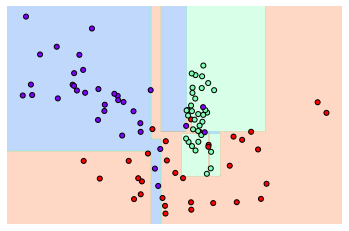

In [14]:
from sklearn.tree import DecisionTreeClassifier

# 결정 트리 생성에 별다른 제약이 없도록
# 하이퍼파라미터가 디폴트인 Classifier을 학습하고
# 결정 기준 경계 시각화

# 특정한 트리 생성 제약없는 결정 트리의 Decsion Boundary 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)


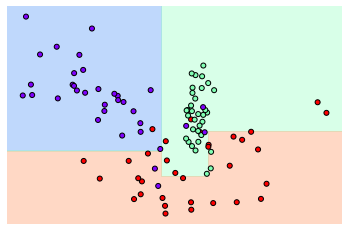

In [29]:
# min_sample_leaf =6 으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features,y_labels)
visualize_boundary(dt_clf,X_features,y_labels)

### 결정트리실습- 사용자 행동 인식 데이터 세트

In [ ]:
# http://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame 으로 로드
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                             header = None, names=['column_index','column_name'])

feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [2]:
feature_name_df.shape

(561, 2)

In [16]:
# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_names = feature_name_df.iloc[:,1].values.tolist()
feature_names[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [17]:
# 중복된 피처명을 확인
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [ ]:
# 원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생.
# 중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성

In [20]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dump_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),columns=['dup_cnt'])
    feature_dump_df = feature_dump_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dump_df,how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name','dup_cnt']].apply(lambda x :x[0]+'_'+
                                                                    str(x[1]) if x[1]>0 else x[0],axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'],axis=1)
    return new_feature_name_df

In [21]:
import pandas as pd
 
def get_human_dataset():
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv 에서 공백 문자를 sep 으로 할당
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                                  header=None, names=['column_index','column_name'])
    # DataFrame 에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    
    # 학습 피처 데이터 세트와 테스트 피처 데이터를 DataFrame 으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+',names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+',names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터를 DataFrame 으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None, names=['action'])
    
    # 로드된 학습/테스트용 DataFrame 을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [22]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [23]:
X_train.head()  

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [21]:
# 레이블 값은 1, 2, 3, 4, 5, 6의 6개 값이고
# 분포도는 특정 값으로 왜곡되지 않고 비교적 고르게 분포되어 있다
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [22]:
# 사이킷런의 decisiontreeclassifier 를 이용해 동작 예측 분류 수행
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

# DecisionTreeClassifier 의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 의 기본 하이퍼 파라미터:\n',dt_clf.get_params())# get_param : 자동 하이퍼파라미터를 조율하는데 유용

결정 트리 예측 정확도:0.8548
DecisionTreeClassifier 의 기본 하이퍼 파라미터:
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 156, 'splitter': 'best'}


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state = 156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도 : {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터 : \n', dt_clf.get_params())

결정 트리 예측 정확도 : 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터 : 
 {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': False, 'random_state': 156, 'splitter': 'best'}


In [24]:
# GridsearchCV 를 이용해 max_depth 값을 변화시키면서 에측 성능 확인
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}

grid_cv = GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.8min finished


GridSearchCV 최고 평균 정확도 수치:0.8526
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8}


In [ ]:
# max_depth 가 8개일때 85.26%로 최고정확도 수치

In [31]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.881982,0.080082,0.004975,0.000651,6,{'max_depth': 6},0.814111,0.873555,0.819728,0.865895,0.881471,0.850925,0.028282,4
1,2.375246,0.048834,0.005199,0.000734,8,{'max_depth': 8},0.820896,0.827328,0.855102,0.868618,0.891008,0.852557,0.026007,1
2,2.782963,0.090706,0.004797,0.000735,10,{'max_depth': 10},0.799864,0.813052,0.863265,0.891082,0.887602,0.850925,0.037828,4
3,3.290604,0.196050,0.005984,0.001093,12,{'max_depth': 12},0.795115,0.813052,0.848980,0.877468,0.886240,0.844124,0.035436,7
4,3.779818,0.389351,0.005180,0.000973,16,{'max_depth': 16},0.799864,0.822570,0.853061,0.887679,0.897820,0.852149,0.037310,2
5,3.434015,0.307340,0.005393,0.001009,20,{'max_depth': 20},0.803256,0.822570,0.856463,0.877468,0.898501,0.851605,0.034855,3
6,3.414681,0.328570,0.004382,0.000494,24,{'max_depth': 24},0.796472,0.822570,0.856463,0.877468,0.898501,0.850245,0.036793,6


In [29]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850925
1,8,0.852557
2,10,0.850925
3,12,0.844124
4,16,0.852149
5,20,0.851605
6,24,0.850245


In [ ]:
# 깊어진 트리는 학습 데이터 세트에는 올바른 예측 결과를 가져올지 모르지만
# 검증 데이터 세트에서는 오히려 과적합으로 인한 성능 저하를 유발한다

In [32]:
max_depths = [6,8,10,12,16,20,24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정 
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print('max_depth = {0} 정확도{1:.4f}'.format(depth,accuracy))

max_depth = 6 정확도0.8558
max_depth = 8 정확도0.8707
max_depth = 10 정확도0.8673
max_depth = 12 정확도0.8646
max_depth = 16 정확도0.8575
max_depth = 20 정확도0.8548
max_depth = 24 정확도0.8548


In [27]:
# max_depth 와 min_samples_split 을 같이 변경하면서 정확도 성능 튜닝
params ={
    'max_depth':[8,12,16,20],
    'min_samples_split':[16,24]
}

grid_cv = GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:',grid_cv.best_params_)

NameError: name 'GridSearchCV' is not defined

In [ ]:
# grid_cv의 속성인 best_estimator_는 
# 최적 하이퍼 파라미터인 max_depth 8, min_samples_split 16으로 학습이 완료된 Estimator 객체

best_dt_clf = grid_cv.best_estimator_
pred1 =best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))


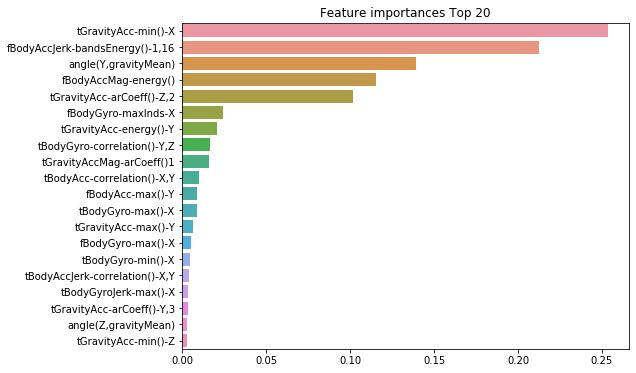

In [40]:
# 각 피처의 중요도 feature_importances_
import seaborn as sns

ftr_importances_values = best_dt_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()


### 04 랜덤포레스트

- 배깅은 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만,
 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행.랜덤포레스트가 대표적인 배깅 방식
- 부트스트래핑 : 여러 개의 데이터 세트를 중첩되게 분리하는 것  
- 교차 검증이 데이터 세트간에 중첩을 허용하지 않는 것과 다르게 배깅 방식은 중첩을 허용
- bagging = bootstrap aggregating 

배깅의 대표적인 알고리즘
- 기반 알고리즘은 '결정 트리'
=> 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있다
- 개별 트리가 학습하는 데이터 세트는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트

- 여러 개의 데이터 세트를 중첩되게 분리하는 것 : 부트스트래핑(bootstrapping) 분할 방식

사이킷런은 RandomForestClassifer 클래스를 통해
랜덤 포레스트 기반의 분류를 지원

사용자 행동 인식 예측 데이터 사용

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train,X_test,y_train,y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤 포레스트 정확도:{0:.4f}'.format(accuracy))

랜덤 포레스트 정확도:0.9108


#### 랜덤 포레스트 하이퍼 파리마터 및 튜닝

랜덤 포레스트 파라미터
- n_estimators : 랜덤 포레스트에서 결정 트리의 개수 지정 (디폴트 10개)
- max_features : (디폴트 'auto' = 'sqrt': 전체 피쳐 개수) 
- max_depth 
- min_samples_leaf

In [28]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행

# 멀티 코어 환경에서는 
# RandomForestClassifier 생성자와 GridSearchCV 생성 시 n_jobs=-1 파라미터를 추가하면
# 모든 CPU 코어를 이용해 학습할 수 있다

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf,param_grid = params,cv=2, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도:0.9166


n_estimators를 300으로 증가시키고, 
최적화 하이퍼 파라미터로 다시 RandomForestClassifier를 학습시킨 뒤에
별도의 테스트 데이터 세트에서 예측 성능 측정

In [44]:
rf_clf1= RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_leaf=8,\
                               min_samples_split=8, random_state=0)

rf_clf1.fit(X_train,y_train)
pred=rf_clf1.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도:0.9165


n_estimator 가 증가된다고 성능이 무조건 향상되는것은 아님을 알 수 있다. 또한 수행시간이 오래걸림

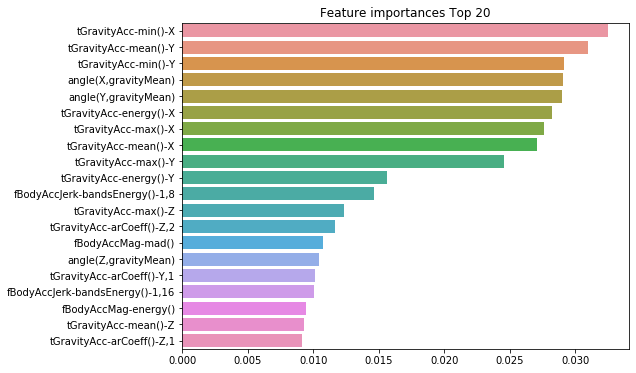

In [45]:
# 각 피처의 중요도 feature_importances_
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]


plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

### 05 GRM(그래디언트 부스팅)

부스팅은 여러 개의 약한 학습기를 순차적으로 학습-예측 하면서 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해 나가면서 학습

- Adaboost(adaptive boosting): 오류 데이터에 가중치를 부여
- GBM : 에이다부스트와 유사하나, 가중치 업데이트를 경사 하강법을 이용. 즉, 반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법


In [29]:
# GBM: GradientBoostingClassifier 이용
from sklearn.ensemble import  GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()
gb_clf =  GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)

print('GBM 정확도:{0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간:{0:.1f}초'.format(time.time() - start_time))

GBM 정확도:0.9386
GBM 수행 시간:205.6초


GBM 은 랜덤포레스트보다 정확도가 뛰어난 경우가 많지만 시간이 오래 걸리고 하이퍼 파라미터 튜닝 노력이 필요하다는 단점

GBM 하이퍼 파라미터 및 튜닝

In [47]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate' : [0.05,0.1]
}
grid_cv =GridSearchCV(gb_clf, param_grid = params, cv=2, verbose=1) #  n_jobs=-1 수행시간 단축 
grid_cv.fit(X_train,y_train)
print('최적 하이퍼 파라미터:\n',grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 19.4min finished


최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 500}
최고 예측 정확도:0.9014


In [48]:
# GridSearchCV 를 이용해 최적으로 학습된 estimator 로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)
print('GBM 정확도:{0:.4f}'.format(gb_accuracy))

GBM 정확도:0.9396
